# Negative Binomial Regression Modeling of Suicide Quantities vs. Cancer

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import datasets:

In [2]:
suicides = pd.read_csv('../Suicide/CSV/suicides_codmunres.csv')
population = pd.read_csv('../util/POPULATION_2017.csv', index_col=0)
municipalities = pd.read_csv('../util/CADMUN.csv')
cancer = pd.read_csv('CANCERBR2017.csv', index_col=0)

In [3]:
suicides.shape, population.shape, municipalities.shape, cancer.shape

((3149, 2), (5570, 2), (5652, 28), (5359, 2))

In [4]:
len(suicides[suicides['SUICIDES'] == 0])

0

Let's merge the files:

In [5]:
df = pd.merge(left=population, right=municipalities, left_on='MUNCOD', right_on='MUNCOD', how='left')
df = pd.merge(left=df, right=cancer, left_on='MUNCOD', right_on='MUNCOD', how='right')
df = pd.merge(left=df, right=suicides, left_on='MUNCOD', right_on='CODMUNRES', how='left')
df.shape

(5359, 32)

In [6]:
df.head()

,POPULATION,MUNCOD,MUNCODDV,SITUACAO,MUNSINP,MUNSIAFI,MUNNOME,MUNNOMEX,OBSERV,MUNSINON,MUNSINONDV,AMAZONIA,FRONTEIRA,CAPITAL,UFCOD,MESOCOD,MICROCOD,MSAUDCOD,RSAUDCOD,CSAUDCOD,RMETRCOD,AGLCOD,ANOINST,ANOEXT,SUCESSOR,LATITUDE,LONGITUDE,ALTITUDE,AREA,QUANTIDADE,CODMUNRES,SUICIDES
0,25437.0,110001.0,1100015.0,ATIVO,26016.0,33.0,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,NaN,NaN,NaN,S,S,N,11.0,1102.0,11006.0,1190.0,1102.0,11900.0,1190.0,1190.0,1986.0,NaN,NaN,-11.929,-61.996,350.0,7066.702,25,110001.0,3.0
1,107345.0,110002.0,1100023.0,ATIVO,26004.0,7.0,Ariquemes,ARIQUEMES,NaN,NaN,NaN,S,N,N,11.0,1102.0,11003.0,1190.0,1104.0,11900.0,1190.0,1190.0,1977.0,NaN,NaN,-9.913,-63.041,142.0,4426.558,66,110002.0,10.0
2,6224.0,110003.0,1100031.0,ATIVO,26020.0,37.0,Cabixi,CABIXI,NaN,NaN,NaN,S,S,N,11.0,1102.0,11008.0,1190.0,1103.0,11900.0,1190.0,1190.0,1989.0,NaN,NaN,-13.492,-60.545,230.0,1314.355,4,NaN,NaN
3,88507.0,110004.0,1100049.0,ATIVO,26007.0,9.0,Cacoal,CACOAL,NaN,NaN,NaN,S,N,N,11.0,1102.0,11006.0,1190.0,1102.0,11900.0,1190.0,1190.0,1977.0,NaN,NaN,-11.438,-61.448,200.0,3792.638,133,110004.0,5.0
4,17934.0,110005.0,1100056.0,ATIVO,26014.0,27.0,Cerejeiras,CEREJEIRAS,NaN,NaN,NaN,S,S,N,11.0,1102.0,11008.0,1190.0,1103.0,11900.0,1190.0,1190.0,1983.0,NaN,NaN,-13.189,-60.812,277.0,2783.305,15,110005.0,1.0


In [7]:
df = df[['MUNCOD', 'POPULATION', 'CAPITAL', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'AREA', 'QUANTIDADE', 'SUICIDES']]
df = df.rename(columns={"QUANTIDADE": "CANCER_QTT"})
df.head()

,MUNCOD,POPULATION,CAPITAL,LATITUDE,LONGITUDE,ALTITUDE,AREA,CANCER_QTT,SUICIDES
0,110001.0,25437.0,N,-11.929,-61.996,350.0,7066.702,25,3.0
1,110002.0,107345.0,N,-9.913,-63.041,142.0,4426.558,66,10.0
2,110003.0,6224.0,N,-13.492,-60.545,230.0,1314.355,4,NaN
3,110004.0,88507.0,N,-11.438,-61.448,200.0,3792.638,133,5.0
4,110005.0,17934.0,N,-13.189,-60.812,277.0,2783.305,15,1.0


In [8]:
(df['POPULATION'].isnull()).value_counts()

False    5354
True        5
Name: POPULATION, dtype: int64

In [9]:
df = df[~df['POPULATION'].isnull()]
(df['POPULATION'].isnull()).value_counts()

False    5354
Name: POPULATION, dtype: int64

As there's no municipality with 0 suicides, let's assume these ones have 0 suicides for the year of 2017.

In [10]:
df['MUNCOD'] = df['MUNCOD'].astype(np.int64)
df['POPULATION'] = df['POPULATION'].astype(np.int64)
df['SUICIDES'] = df['SUICIDES'].fillna(0).astype(np.int64)

In [11]:
df.head()

,MUNCOD,POPULATION,CAPITAL,LATITUDE,LONGITUDE,ALTITUDE,AREA,CANCER_QTT,SUICIDES
0,110001,25437,N,-11.929,-61.996,350.0,7066.702,25,3
1,110002,107345,N,-9.913,-63.041,142.0,4426.558,66,10
2,110003,6224,N,-13.492,-60.545,230.0,1314.355,4,0
3,110004,88507,N,-11.438,-61.448,200.0,3792.638,133,5
4,110005,17934,N,-13.189,-60.812,277.0,2783.305,15,1


To construct a **Baseline**, let's take the estimation of 2016, when the suicide rate was 10.6 suicides per 100,000 persons [FAZEL S., "Suicide"].

In [12]:
baseline = np.floor(df['POPULATION'] / 100000 * 10.6)
baseline.head()

0     2.0
1    11.0
2     0.0
3     9.0
4     1.0
Name: POPULATION, dtype: float64

As the metrics to evaluate the baseline, we'll use:

- **Root Mean Squared Log Error (RMSLE):** Robust error metric for regression, with large error for underestimation.
- **R-Squared and Adjusted R^2 (R^2 and Adj. R^2):** Compares how well the model predicts compared to the average prediction (adjusted: not sensible to the qtt of features).

Evaluanting the baseline:

In [13]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
np.sqrt(mean_squared_log_error(df['SUICIDES'], baseline)), r2_score(df['SUICIDES'], baseline)

(0.6116856140218698, -1.5781863811916517)

As our examples are not so numerous (=~ 5300), we can divide the dataset as follows:

- 50% training set
- 50% validation set

In [16]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[['POPULATION', 'CANCER_QTT']]
y = df['SUICIDES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2677, 2), (2677,), (2677, 2), (2677,))

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_counts = model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, predicted_counts)), r2_score(y_test, predicted_counts)

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.8376106962300905, 0.03712600409815858)

In [39]:
predicted_counts.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

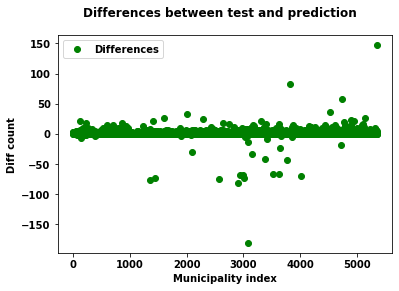

In [35]:
fig = plt.figure()
fig.suptitle('Differences between test and prediction')
difference = y_test - predicted_counts
diff, = plt.plot(X_test.index, difference, 'go', label='Differences')
plt.xlabel('Municipality index')
plt.ylabel('Diff count')
plt.legend(handles=[diff])
plt.show()

As we see, our metrics show greater error (RMSLE) and inferior R^2.

So, this first Poisson model is **inferior to the chosen baseline.**

---

Next steps:

- Model as Negative Binomial Regression (doesn't imply that the mean and variance are equal)

- Consider other variables in the model (CAPITAL, LATITUDE, LONGITUDE, ALTITUDE, AREA) in order to understand better the data (don't forget to cast to positive numbers)

- Try with other diseases